In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as psx
from plotly.subplots import make_subplots
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,RobustScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("Data/Datavalidation.csv")
data

,person_gender,person_education,person_emp_exp,person_home_ownership,loan_intent,loan_int_rate,loan_percent_income,credit_score,previous_loan_defaults_on_file,person_age,person_income,loan_amnt,cb_person_cred_hist_length,loan_status
0,female,Master,0,RENT,PERSONAL,16.02,0.49,561,No,22,71948,35000,3,1
1,female,High School,0,OWN,EDUCATION,11.14,0.08,504,Yes,21,12282,1000,2,0
2,female,High School,3,MORTGAGE,MEDICAL,12.87,0.44,635,No,25,12438,5500,3,1
3,female,Bachelor,0,RENT,MEDICAL,15.23,0.44,675,No,23,79753,35000,2,1
4,male,Master,1,RENT,MEDICAL,14.27,0.53,586,No,24,66135,35000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44988,male,Associate,6,RENT,MEDICAL,15.66,0.31,645,No,27,47971,15000,3,1
44989,female,Associate,17,RENT,HOMEIMPROVEMENT,14.07,0.14,621,No,37,65800,9000,11,1
44990,male,Associate,7,RENT,DEBTCONSOLIDATION,10.02,0.05,668,No,33,56942,2771,10,1
44991,male,Bachelor,4,RENT,EDUCATION,13.23,0.36,604,No,29,33164,12000,6,1


In [70]:
categorical = data.iloc[:,[0,1,3,4,8]]
Onehot = OneHotEncoder()
Model_fit = Onehot.fit_transform(categorical)
new = pd.DataFrame(Model_fit.toarray(),columns=Onehot.get_feature_names_out())
data = pd.concat([new,data.drop(columns=["person_gender","person_education","person_home_ownership","loan_intent","previous_loan_defaults_on_file"])])
data

array([[0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]], shape=(44993, 10))

In [4]:
data.describe()

,person_gender_female,person_gender_male,person_education_Associate,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,previous_loan_defaults_on_file_Yes,person_emp_exp,loan_int_rate,loan_percent_income,credit_score,person_age,person_income,loan_amnt,cb_person_cred_hist_length,loan_status
count,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,...,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,4.499300e+04,44993.000000,44993.000000,44993.000000
mean,0.448003,0.551997,0.267286,0.297735,0.013802,0.266041,0.155135,0.410842,0.002600,0.065588,...,0.507990,5.394528,11.006448,0.139736,632.585713,27.748428,7.990845e+04,9583.176761,5.866557,0.222257
std,0.497294,0.497294,0.442548,0.457268,0.116670,0.441891,0.362038,0.491992,0.050928,0.247563,...,0.499942,5.927159,2.978985,0.087207,50.402411,5.909737,6.332213e+04,6314.802655,3.877167,0.415767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.420000,0.000000,390.000000,20.000000,8.000000e+03,500.000000,2.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,8.590000,0.070000,601.000000,24.000000,4.719500e+04,5000.000000,3.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,11.010000,0.120000,640.000000,26.000000,6.704600e+04,8000.000000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,8.000000,12.990000,0.190000,670.000000,30.000000,9.577800e+04,12237.000000,8.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,76.000000,20.000000,0.660000,784.000000,94.000000,2.448661e+06,35000.000000,30.000000,1.000000


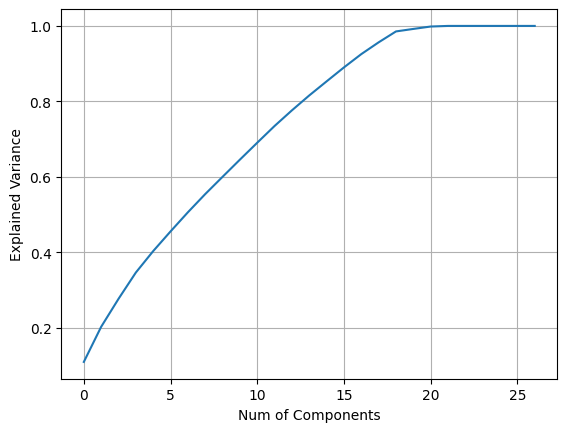

In [63]:
#StandardScaler
std = StandardScaler()
std_data = std.fit_transform(data)
std_df = pd.DataFrame(std_data,columns=data.columns)
#PCA
Pca = PCA()
Pca_fit = Pca.fit_transform(std_df.drop(columns=["loan_status"])) #on all components
plt.plot(np.cumsum(Pca.explained_variance_ratio_))
plt.xlabel('Num of Components')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

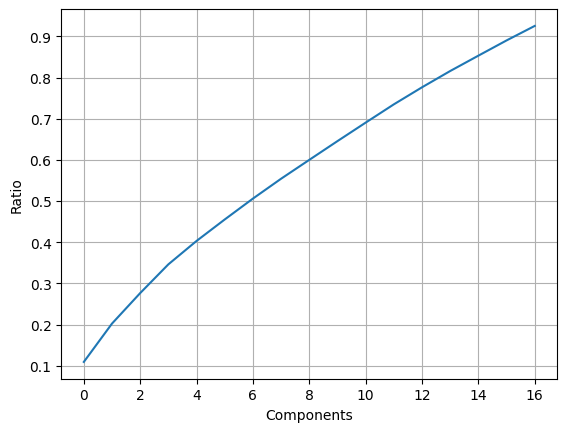

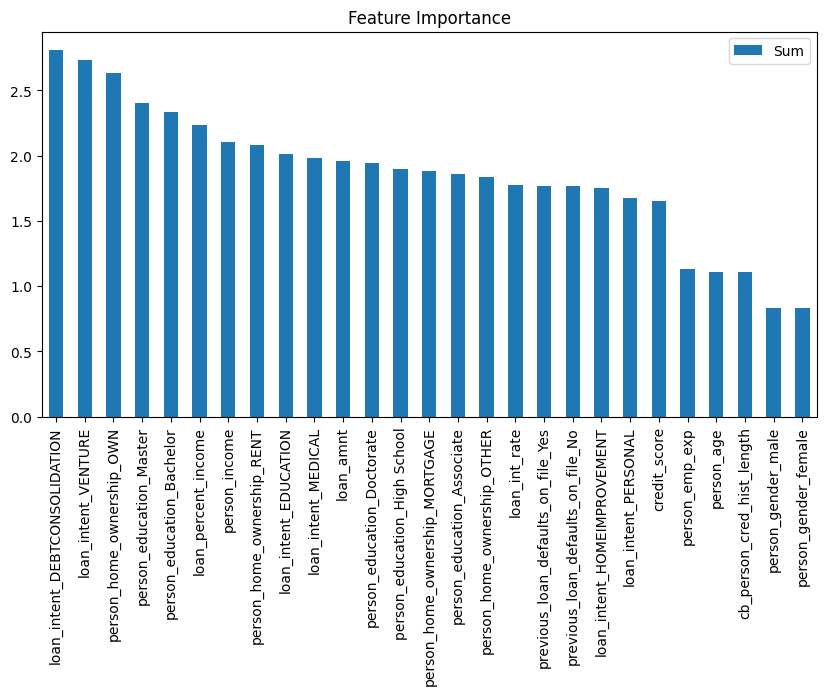

In [111]:
#pca with optimal components
pca = PCA(n_components=17)
pca_ = pca.fit_transform(std_df.drop(columns=["loan_status"]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Components")
plt.ylabel("Ratio")
plt.grid()
plt.show()
# selection of important features
cmpnts = pca.components_
new_data = pd.DataFrame(np.abs(cmpnts),columns=std_df.drop(columns=["loan_status"]).columns)
df= pd.DataFrame(np.array(np.sum(new_data,axis=0)),columns=["Sum"],index=std_df.drop(columns=["loan_status"]).columns).sort_values(by="Sum",ascending=False)
fig = df.plot(kind="bar",figsize=(10,5),title="Feature Importance")
fig.get_figure().savefig("Visuals/PCA_plot.png")

In [99]:
reduced_data = data.drop(columns=["person_emp_exp","cb_person_cred_hist_length","person_age","person_gender_female","person_gender_male"])
reduced_data

,person_education_Associate,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,...,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes,loan_int_rate,loan_percent_income,credit_score,person_income,loan_amnt,loan_status
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,16.02,0.49,561,71948,35000,1
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,11.14,0.08,504,12282,1000,0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,12.87,0.44,635,12438,5500,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,15.23,0.44,675,79753,35000,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,14.27,0.53,586,66135,35000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44988,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,15.66,0.31,645,47971,15000,1
44989,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,14.07,0.14,621,65800,9000,1
44990,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,10.02,0.05,668,56942,2771,1
44991,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,13.23,0.36,604,33164,12000,1


In [100]:
#scaling
Scale =RobustScaler() #robust to outliers
Scale_ = Scale.fit_transform(reduced_data.iloc[:,17:22])
new = pd.DataFrame(np.array(Scale_),columns=reduced_data.iloc[:,17:22].columns)
reduced_data_ = pd.concat([reduced_data.drop(columns=reduced_data.iloc[:,17:23].columns),new,reduced_data.iloc[:,[-1]]],axis=1)
reduced_data_

,person_education_Associate,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,...,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes,loan_int_rate,loan_percent_income,credit_score,person_income,loan_amnt,loan_status
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.138636,3.083333,-1.144928,0.100899,3.730828,1
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.029545,-0.333333,-1.971014,-1.127226,-0.967252,0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.422727,2.666667,-0.072464,-1.124015,-0.345447,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.959091,2.666667,0.507246,0.261552,3.730828,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.740909,3.416667,-0.782609,-0.018751,3.730828,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44988,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.056818,1.583333,0.072464,-0.392627,0.967252,1
44989,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.695455,0.166667,-0.275362,-0.025647,0.138179,1
44990,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,-0.225000,-0.583333,0.405797,-0.207974,-0.722537,1
44991,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.504545,2.000000,-0.521739,-0.697404,0.552715,1


In [101]:
reduced_data_.to_csv("Data/Transformed.csv",index=False)

## FINAL REPORT: DATA-TRANSFORMATION
<li>
    Encoded Categorical Features using OneHotEncoder
</li>
<li>Converted Dataset into SNF(Standard Normal Form) using StandardScaler and performed PCA.Dropped Features "person_emp_exp","cb_person_cred_hist_length","person_age","person_gender_female","person_gender_male"
</li>
<li>Scaled Features loan_int_rate loan_percent_income credit_score person_income loan_amnt using RobustScaler due to presence of more Outliers</li>
<img src="Visuals/PCA_plot.png">


